In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext jupyter_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from njl_corf import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]

In [2]:
import pint

# from matplotlib.patches import Rectangle

In [3]:
%autoreload 2

In [4]:
from njl_corf import pyiturr5 as rr, wrc27_views
from njl_corf.wrc27_individual_ai_figures import all_individual_figures, wrc27_ai_figure

In [5]:
allocation_database = rr.parse_rr_file()

Reading from pdf file: RR5-6, RR5-7, RR5-8, RR5-9, RR5-10, 

/Users/livesey/corf/njl-corf/njl_corf/pyiturr5/parse_rr_pdf.py:361: UserWarning: Unable to parse table row, missing band
  warnings.warn("Unable to parse table row, missing band")


RR5-11, RR5-12, RR5-13, RR5-14, RR5-15, RR5-16, RR5-17, RR5-18, RR5-19, RR5-20, RR5-21, RR5-22, RR5-23, RR5-24, RR5-25, RR5-26, RR5-27, RR5-28, RR5-29, RR5-30, RR5-31, RR5-32, RR5-33, RR5-34, RR5-35, RR5-36, RR5-37, RR5-38, RR5-39, RR5-40, RR5-41, RR5-42, RR5-43, RR5-44, RR5-45, RR5-46, RR5-47, RR5-48, RR5-49, RR5-50, RR5-51, RR5-52, RR5-53, RR5-54, RR5-55, RR5-56, RR5-57, RR5-58, RR5-59, RR5-60, RR5-61, RR5-62, RR5-63, RR5-64, RR5-65, RR5-66, RR5-67, RR5-68, RR5-69, RR5-70, RR5-71, RR5-72, RR5-73, RR5-74, RR5-75, RR5-76, RR5-77, RR5-78, RR5-79, RR5-80, RR5-81, RR5-82, RR5-83, RR5-84, RR5-85, RR5-86, RR5-87, RR5-88, RR5-89, RR5-90, RR5-91, RR5-92, RR5-93, RR5-94, RR5-95, RR5-96, RR5-97, RR5-98, RR5-99, RR5-100, RR5-101, RR5-102, RR5-103, RR5-104, RR5-105, RR5-106, RR5-107, RR5-108, RR5-109, RR5-110, RR5-111, RR5-112, RR5-113, RR5-114, RR5-115, RR5-116, RR5-117, RR5-118, RR5-119, RR5-120, RR5-121, RR5-122, RR5-123, RR5-124, RR5-125, RR5-126, RR5-127, RR5-128, RR5-129, RR5-130, RR5-131, 

WRC-27 AI-1.17
{'RAS Secondary', 'RAS Footnote', 'RAS Primary', 'EESS Secondary'}


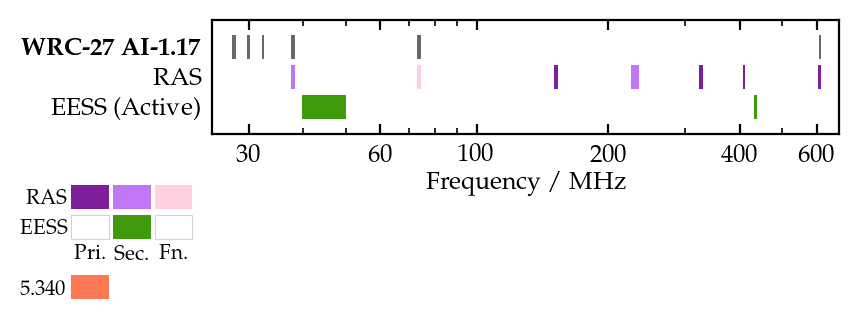

In [14]:
all_individual_figures(
    allocation_database=allocation_database,
    # only=["WRC-31 AIs-2.10-2.11"],
    # only=["WRC-27 AI-1.19"],
    # only=["WRC-27 AI-1.6"],
    only=["WRC-27 AI-1.17"],
    color_scheme="new-b",
    skip_png=False,
    selective_legend=True,
)

In [12]:
from matplotlib.colors import hsv_to_rgb

In [8]:
help(hsv_to_rgb)

Help on function hsv_to_rgb in module matplotlib.colors:

hsv_to_rgb(hsv)
    Convert HSV values to RGB.

    Parameters
    ----------
    hsv : (..., 3) array-like
       All values assumed to be in range [0, 1]

    Returns
    -------
    (..., 3) `~numpy.ndarray`
       Colors converted to RGB values in range [0, 1]



In [9]:
hsv_to_rgb([0.6],[0.2, 0.4], [1.0])

TypeError: hsv_to_rgb() takes 1 positional argument but 3 were given